## Exploratory Data Analysis and Visualization

After data cleaning, Exploratory Data Analysis (EDA) and Visualization are conducted to: 

1. **Understand the data**: EDA helps to provide a comprehensive understanding of the data, including its structure, patterns, and relationships. 

2. **Identify patterns and relationships**: it can also help to identify patterns and relationships between variables that may not be immediately apparent. This can help to generate hypotheses and guide further analysis. Most importantly, it enables us to identify good predictor variables for subsequent model building.

3. **Communicate insights**: Visualization techniques can help to communicate data insights and present findings a clear and understandable way. This can help to facilitate decision-making and drive subsequent modeling action based on the data.

4. **Select appropriate models**: EDA and visualization can help to identify which statistical models or machine learning algorithms may be appropriate for the data. This can help to ensure that the analysis is appropriate and accurate.

5. **Validate assumptions**: EDA and visualization can help to validate assumptions about the data, such as those identified in our secondary research ealier. This can help to ensure that the analysis is appropriate and accurate.


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb #for graphics
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
rawData = pd.read_csv("./Data/Cleaned_Data.csv")
rawData.drop(columns=rawData.columns[0], axis=1, inplace=True)
rawData.head()


,Heart Attack,Income,Race,Gender,Overall Health,Physical Health,Mental Health,Does Exercise,BMI,BMI Category,Have CHD/MI,Hypertension,High Cholesterol,Asthma,Diabetes,Alcohol Consumption,Fruits Consumption,Vegetables Consumption,Smokes,E-cigarette User
0,Not diagnosed before,25000 to < 35000,White,Female,Fair or poor health,Bad,Good,No,14.54,Underweight,No,No,Yes,Yes,No,0.0,1.00,2.14,smoke before,No
1,Not diagnosed before,15000 to < 25000,Black,Female,Good or better health,Excellent,Excellent,No,28.29,Overweight,Yes,Yes,No,No,Yes,0.0,1.00,0.71,Never smoked,No
2,Not diagnosed before,50000 to < 100000,White,Female,Good or better health,Excellent,Good,Yes,33.47,Obese,No,Yes,Yes,No,Yes,300.0,1.14,1.65,Never smoked,No
3,Diagnosed before,15000 to < 25000,Multiracial,Male,Fair or poor health,Bad,Excellent,Yes,28.73,Overweight,Yes,No,Yes,No,Yes,0.0,1.00,2.58,Never smoked,No
4,Not diagnosed before,35000 to < 50000,White,Male,Good or better health,Excellent,Excellent,No,24.37,Normal,No,No,No,No,No,0.0,0.29,0.42,smoke before,No


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186125 entries, 0 to 186124
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Heart Attack            186125 non-null  object 
 1   Income                  186125 non-null  object 
 2   Race                    186125 non-null  object 
 3   Gender                  186125 non-null  object 
 4   Overall Health          186125 non-null  object 
 5   Physical Health         186125 non-null  object 
 6   Mental Health           186125 non-null  object 
 7   Does Exercise           186125 non-null  object 
 8   BMI                     186125 non-null  float64
 9   BMI Category            186125 non-null  object 
 10  Have CHD/MI             186125 non-null  object 
 11  Hypertension            186125 non-null  object 
 12  High Cholesterol        186125 non-null  object 
 13  Asthma                  186125 non-null  object 
 14  Diabetes            

### Understand the Dataset
- Response variable: `Hypertension` </br></br>


19 Deciding Variables located:
- Numeric variables include:
    1. `BMI`
    2. `Alcohol consumption`
    3. `Fruits consumption`
    4. `Vegetables consumption`

- Categorical variables include:
    1. `High Cholesterol`
    2. `Heart Attack`
    3. `Income`
    4. `Race`
    5. `Gender`
    6. `Overall Health`
    7. `Physical Health`
    8. `Mental Health`
    9. `Does Exercise`
    10. `BMI Category`
    11. `Have CHD/MI`
    12. `Asthma`
    13. `Diabetes`
    14. `Smoke before`
    15. `ECigg user`



### Data Analysis and Visualization: Response Variable

In [5]:
# Count of Yes and Nos
rawData['Hypertension'].value_counts()

Hypertension
No     109522
Yes     76603
Name: count, dtype: int64

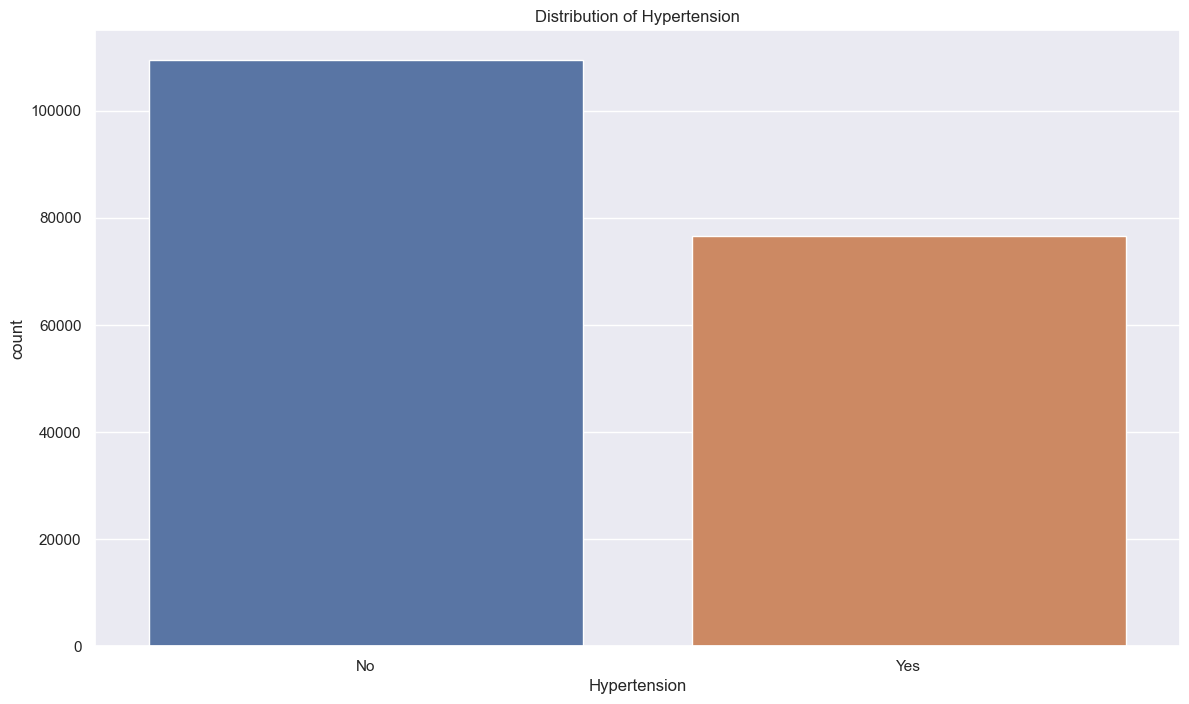

In [6]:
plt.figure(figsize=(14, 8))
ax = sb.countplot(x = "Hypertension", data = rawData)
plt.title("Distribution of Hypertension")
plt.show()

-----------------------------------------------------------------------

### Data Analysis and Visualization of Numeric Variables

In [7]:
#Extract numeric variables
numeric_data = rawData.select_dtypes(include=['float64'])
numeric_data.describe()

,BMI,Alcohol Consumption,Fruits Consumption,Vegetables Consumption
count,186125.000000,186125.000000,186125.000000,186125.000000
mean,28.347619,119.566517,1.229690,1.680149
std,5.415788,191.686197,0.898837,0.783766
min,12.910000,0.000000,0.000000,0.000000
25%,24.390000,0.000000,0.570000,1.140000
50%,27.550000,0.000000,1.000000,1.590000
75%,31.710000,187.000000,2.000000,2.160000
max,43.580000,747.000000,4.140000,3.980000


**Uni-variate Visualization**
- After computing the statistical summary, now we would plot graphs for individual numeric variables. This allows us to convert complex statistical information in a simple, easy-to-understand format. 
- By presenting data visually, it can be easier for us to grasp key insights and take action based on the data.

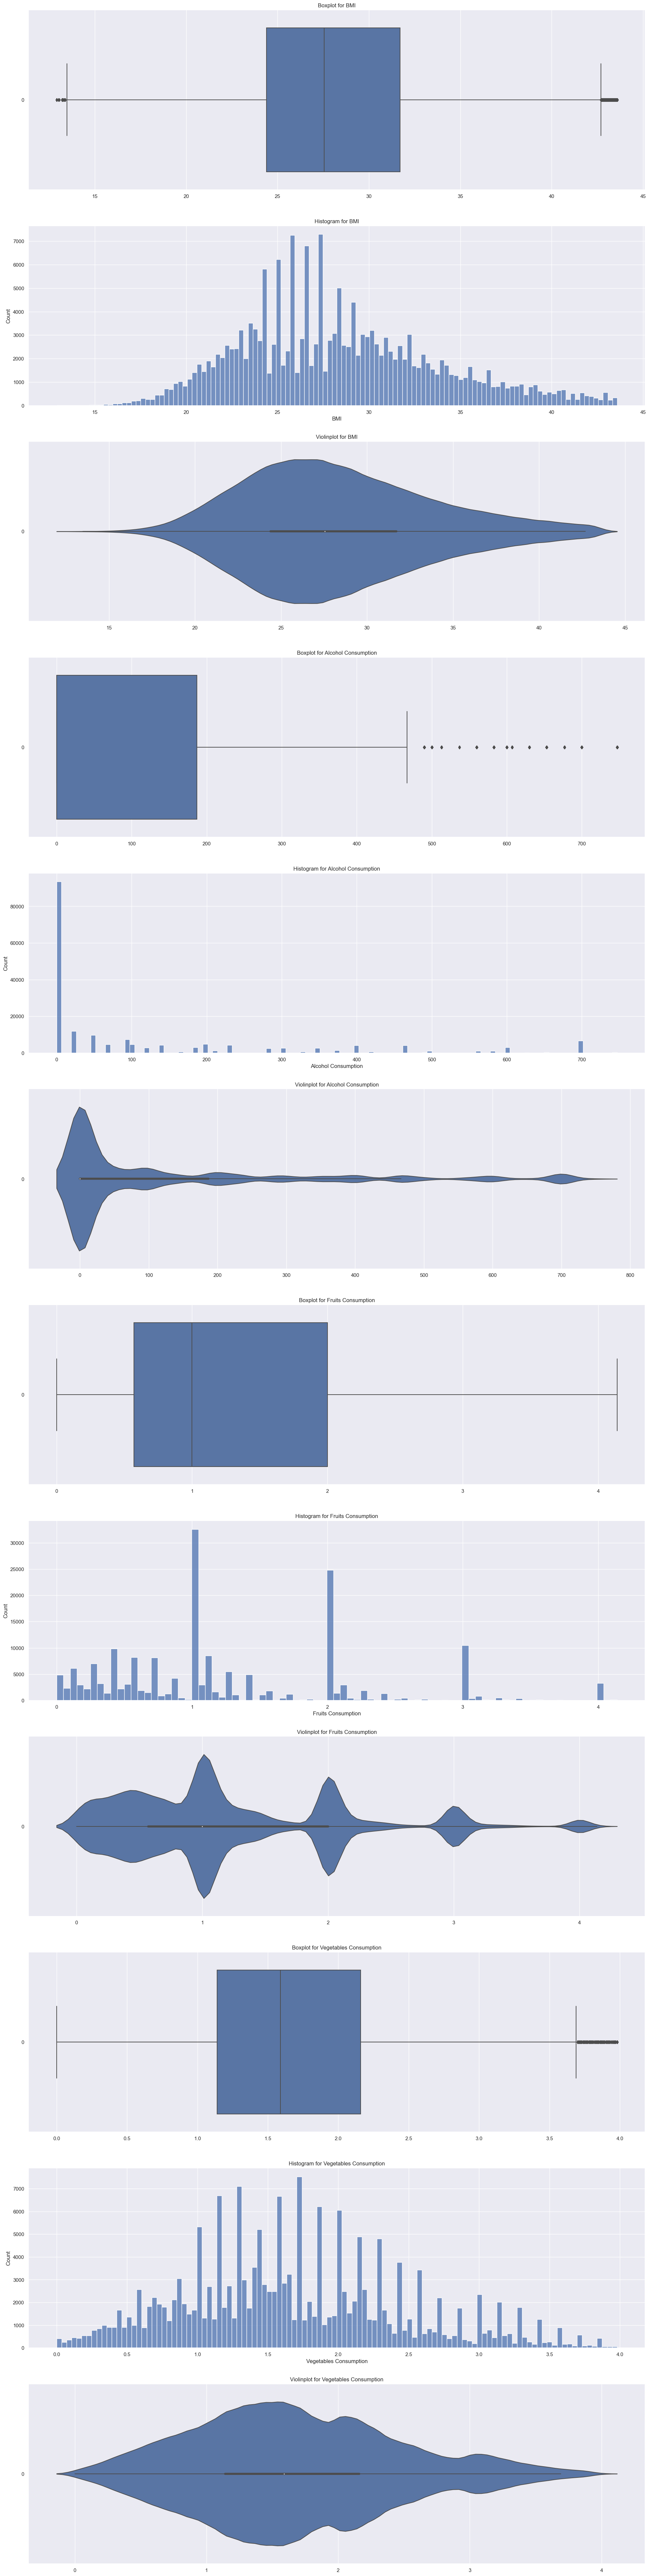

In [8]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(12, 1, figsize=(24, 100)) 

# Plot the basic uni-variate figures for each numeric variable
count=0
for var in numeric_data:
    boxplot = sb.boxplot(data = rawData[var], orient = "h", ax = axes[count]).set(title=f'Boxplot for {var}')
    histplot = sb.histplot(data = rawData[var], ax = axes[count+1]).set(title=f'Histogram for {var}')
    violinplot = sb.violinplot(data = rawData[var], orient = "h", ax = axes[count+2]).set(title=f'Violinplot for {var}')    
    count+=3

#### Bi-variate Visualization
- The next step involves identifying numeric variables that have strong relationships with the response variable, i.e., hypertension.

- Countplots are a useful visualization tool in identifying the relationship between independent numeric variables and a dependent categorical variable because they provide a  representation of the distribution of the numeric variable for each categorical variable.

- Countplots display the median, quartiles, and extreme values (outliers) of a numeric variable for each category of a categorical variable. This enables comparison of the distribution of the numeric variable across different categories of the categorical variable.

[Text(0.5, 1.0, 'BMI'), Text(0.5, 0, 'BMI'), Text(0, 0.5, 'Hypertension')]

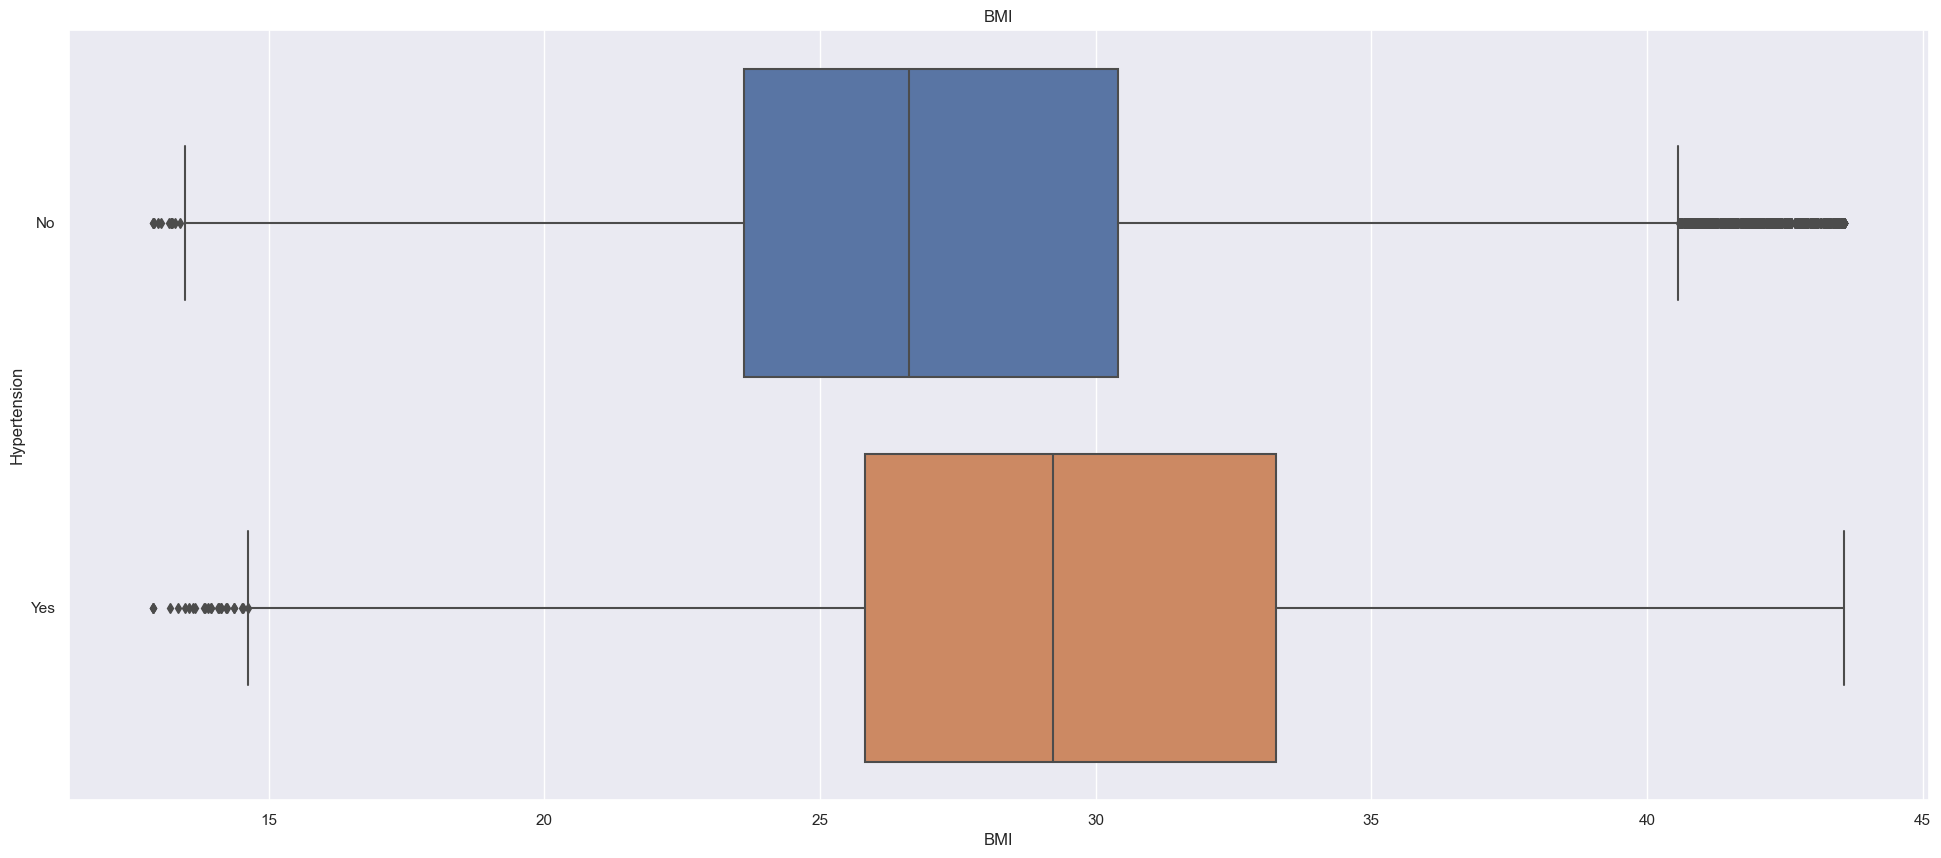

In [9]:
f = plt.figure(figsize=(24,10))
sb.boxplot(x=rawData["BMI"], y=rawData["Hypertension"]).set(
    title="BMI", 
    xlabel='BMI',
    ylabel='Hypertension')

**Interpretation of the Plot**</br>
From the boxplot, the distribution of `BMI` is similar. </br>
In general, when `Hypertension` is present, `BMI` seems to be higher. </br>Hence, there seems to be a weak correlation between `BMI` and `Hypertension`.

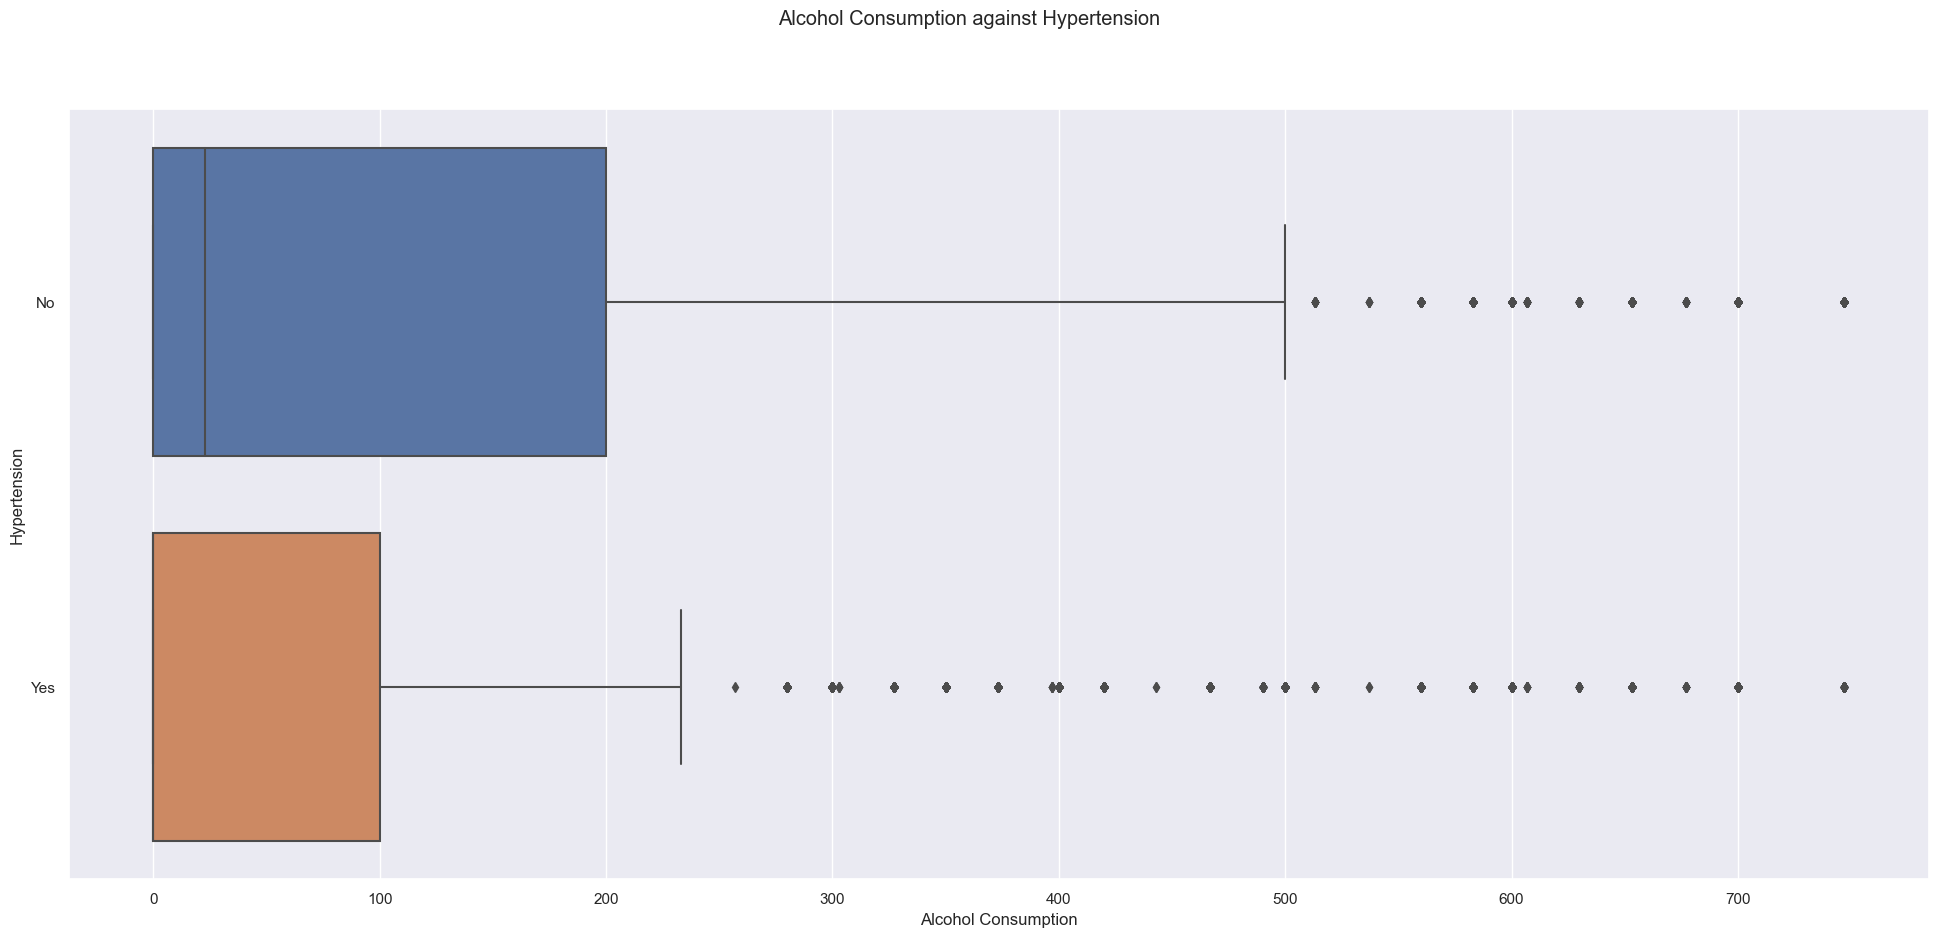

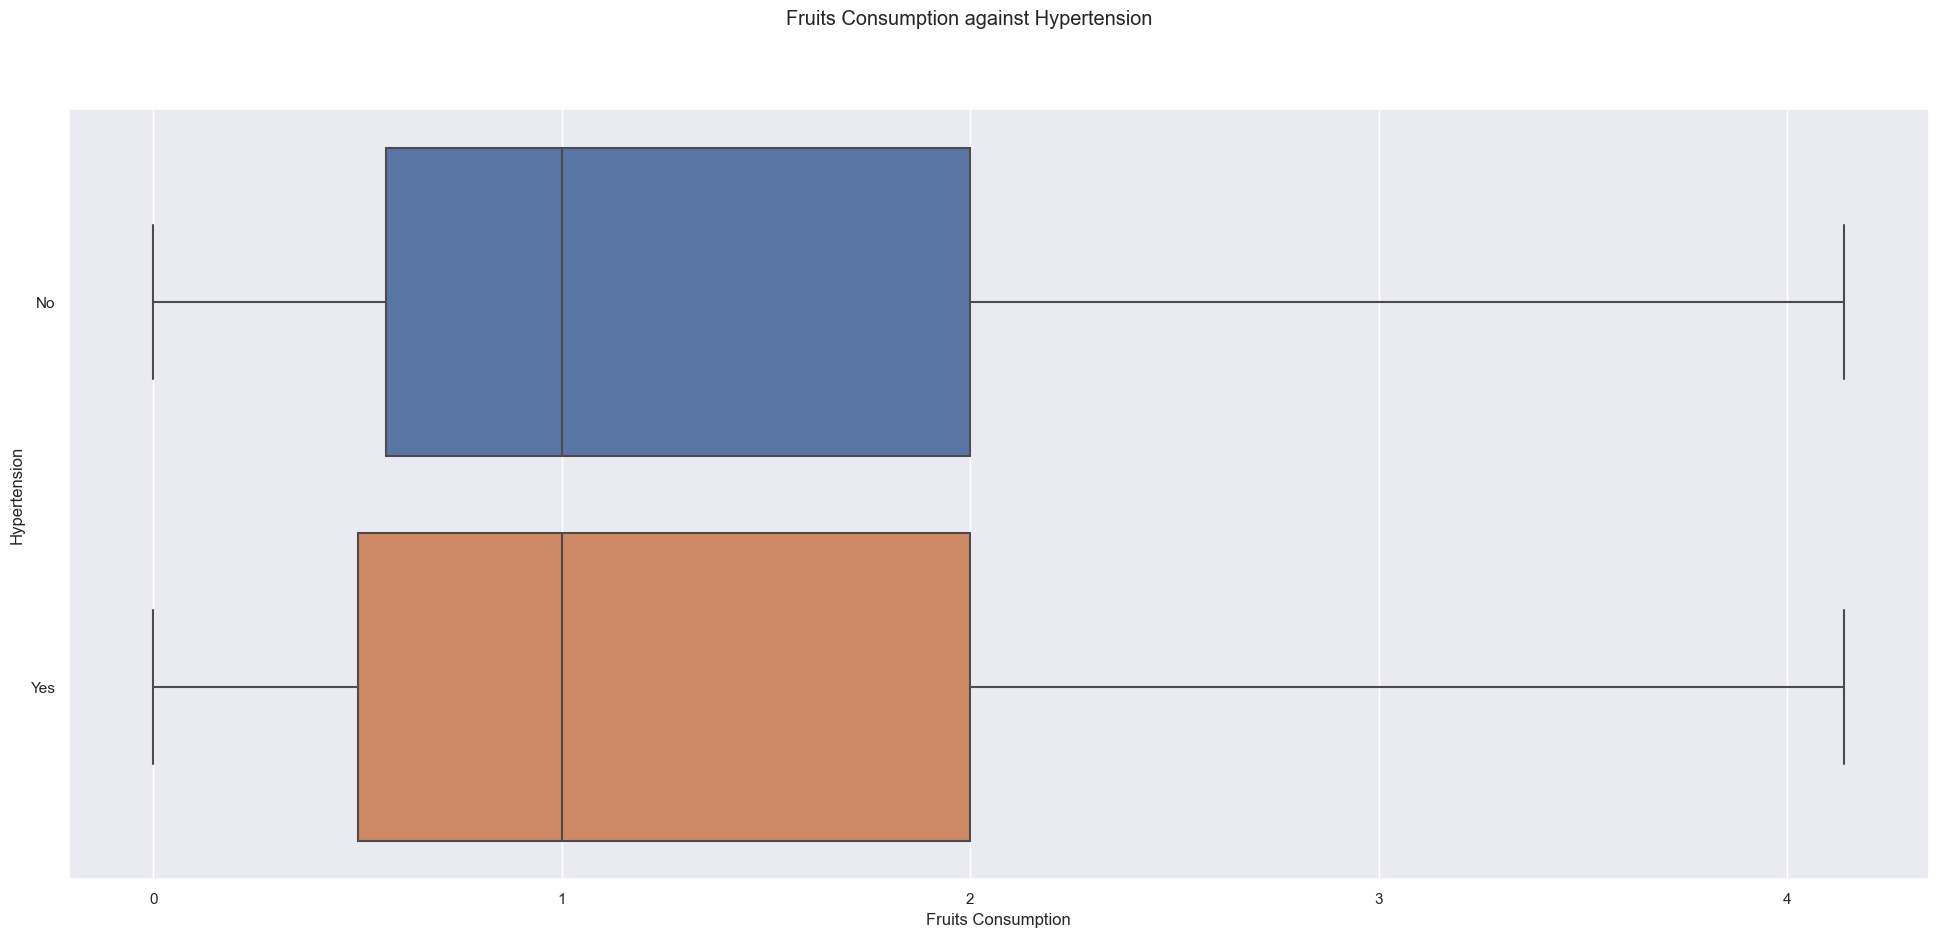

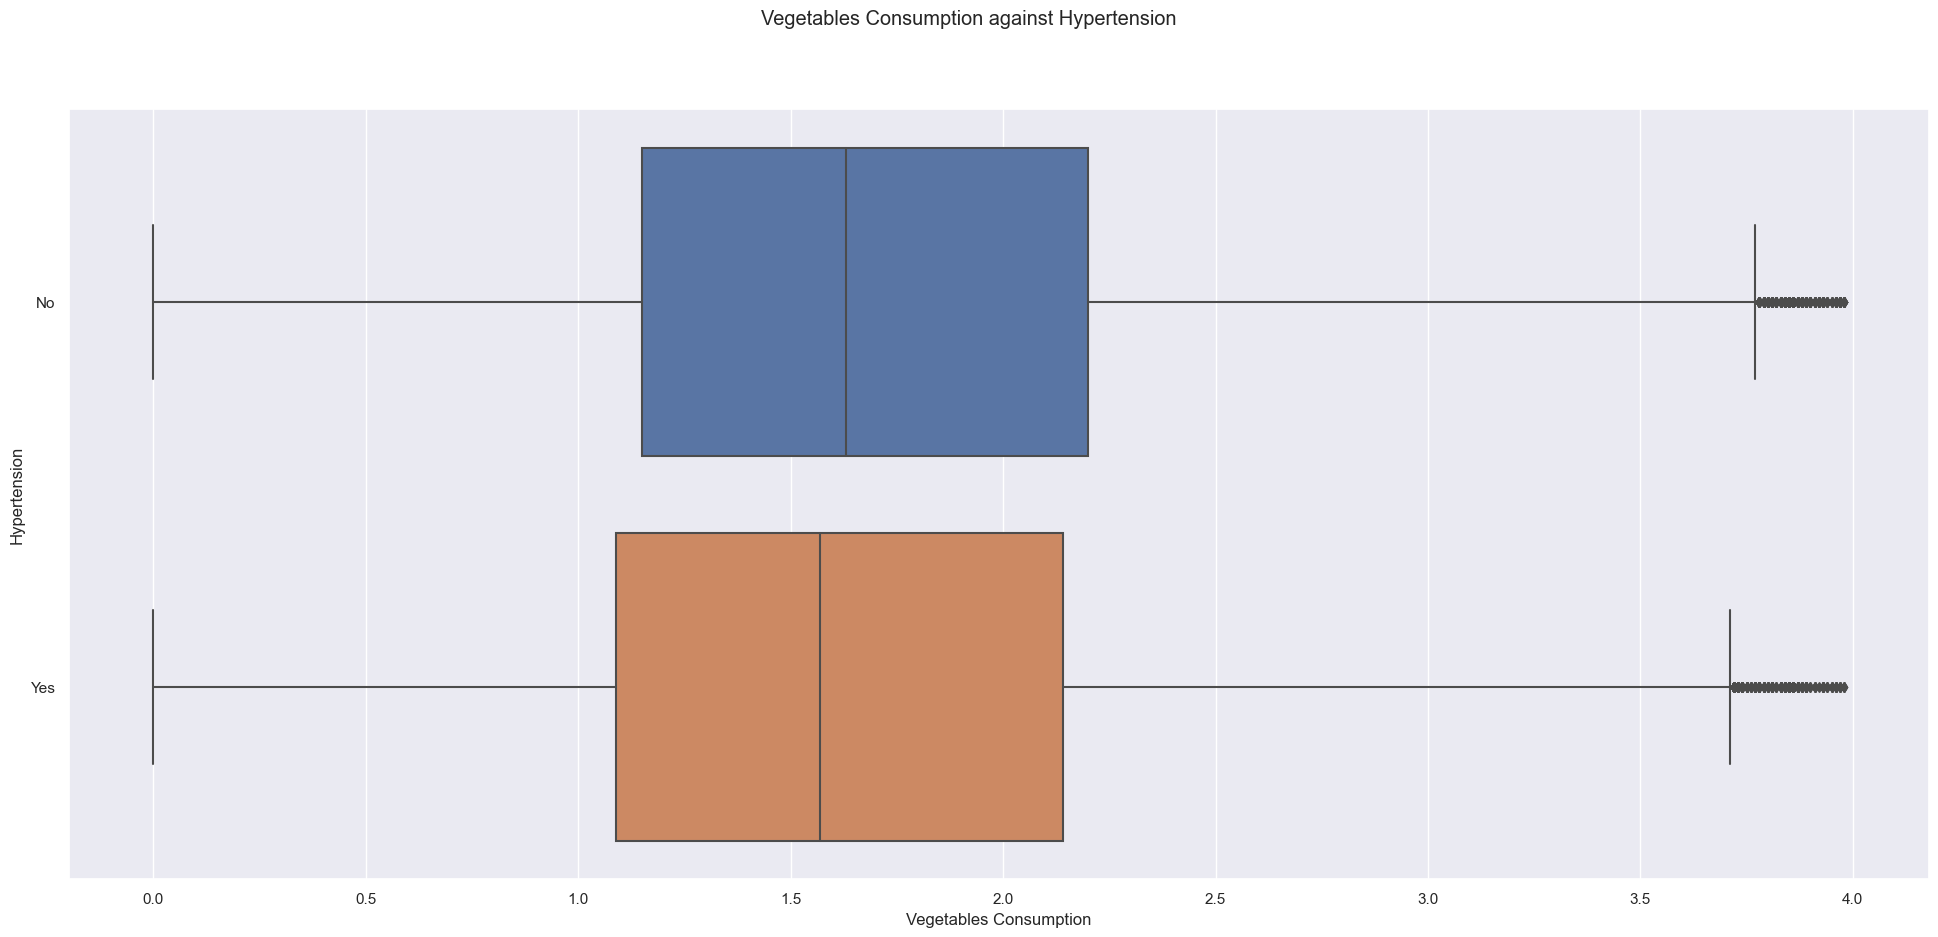

In [10]:
var2 = ['Alcohol Consumption','Fruits Consumption','Vegetables Consumption']

for var in var2:
    f = plt.figure(figsize=(24,10))
    sb.boxplot(x=rawData[var], y=rawData["Hypertension"]).set(
    xlabel=var,
    ylabel='Hypertension')
    plt.suptitle("{} against Hypertension".format(var))
    plt.show()

**Interpretation of the Plot**<br>
From the boxplot, the distribution of all 3 variables  'Alcohol Consumption', 'Fruits Consumption', 'Vegetables Consumption' against 'Hypertension' is similar.<br> 
Thus, this indicates a weak co-relation between them and hypertension.

------------------------------------------------------------------------


### Data Analysis and Visualization of Categorical Variables

**Uni-variate Visualization**
- To better visualize the distribution of individual categorical variable, a count plot is done on each variable. 
- Count plot is a useful visualization tool for visualizing a categorical variable because it provides a simple and intuitive way to display the distribution of observations within each category of the variable.
- It displays the count of observations in each category of a categorical variable as a bar graph. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186125 entries, 0 to 186124
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Heart Attack      186125 non-null  object
 1   Income            186125 non-null  object
 2   Race              186125 non-null  object
 3   Gender            186125 non-null  object
 4   Overall Health    186125 non-null  object
 5   Physical Health   186125 non-null  object
 6   Mental Health     186125 non-null  object
 7   Does Exercise     186125 non-null  object
 8   BMI Category      186125 non-null  object
 9   Have CHD/MI       186125 non-null  object
 10  Hypertension      186125 non-null  object
 11  High Cholesterol  186125 non-null  object
 12  Asthma            186125 non-null  object
 13  Diabetes          186125 non-null  object
 14  Smokes            186125 non-null  object
 15  E-cigarette User  186125 non-null  object
dtypes: object(16)
memory usage: 22.7+ MB


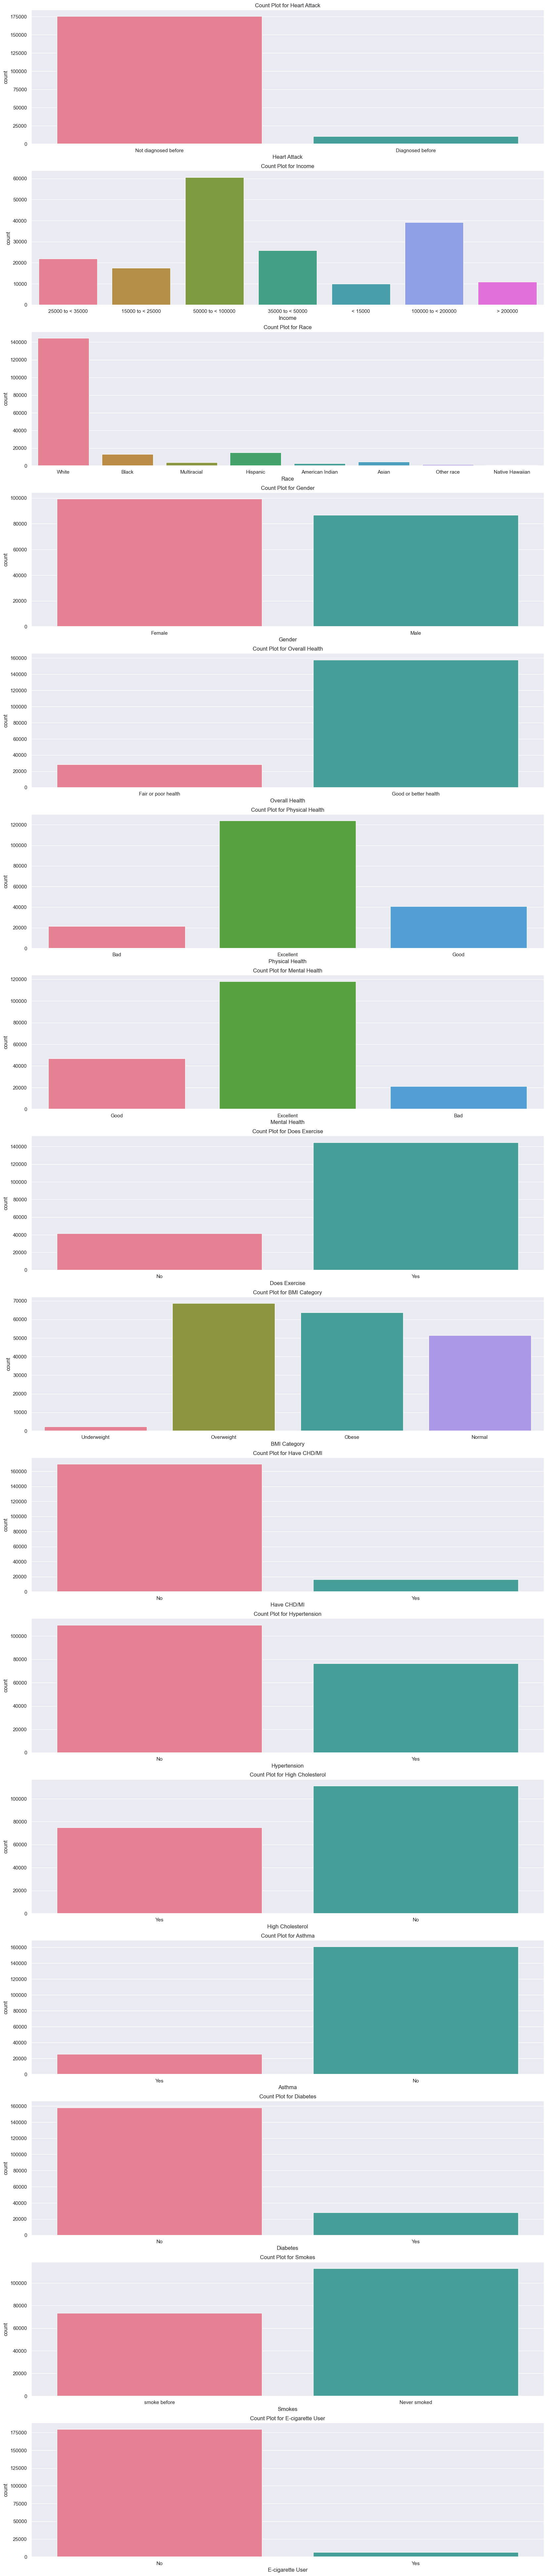

In [11]:
# getting Categorical Variables into a single dataframe, countplots of vars
cat_data = pd.DataFrame(rawData)
for var in numeric_data:
    cat_data.drop([var],inplace=True, axis=1)
count = 0
cat_data.info()
f, axes = plt.subplots(16, 1, figsize=(20, 100)) 
for var in cat_data:
    sb.countplot(data = cat_data , x=var, palette='husl', ax=axes[count]).set(title=f'Count Plot for {var}')
    count+=1


#### Bi-variate Visualization
- Besides numeric variables, we also need to identify categorical variables that have strong relationships with the response variable, i.e., hypertension. To do so, we would use catplots.

- Catplot is a useful visualization tool in identifying the relationship between independent categorical variables and a dependent categorical variable, as they provide a clear visual representation of the distribution of the dependent variable across different categories of the independent variable, enabling comparison and identification of patterns or relationships.

In [12]:
# helper function to print comparison graph
def comparison_countplot(var, orderr):
    plt.figure(figsize=(14, 8))
    if orderr == 0:
        sb.countplot(y=var, hue='Hypertension', data=rawData)
    else:
        sb.countplot(y=var, hue='Hypertension', data=rawData,order=orderr)
    plt.suptitle("{} against Hypertension".format(var))
    plt.show()

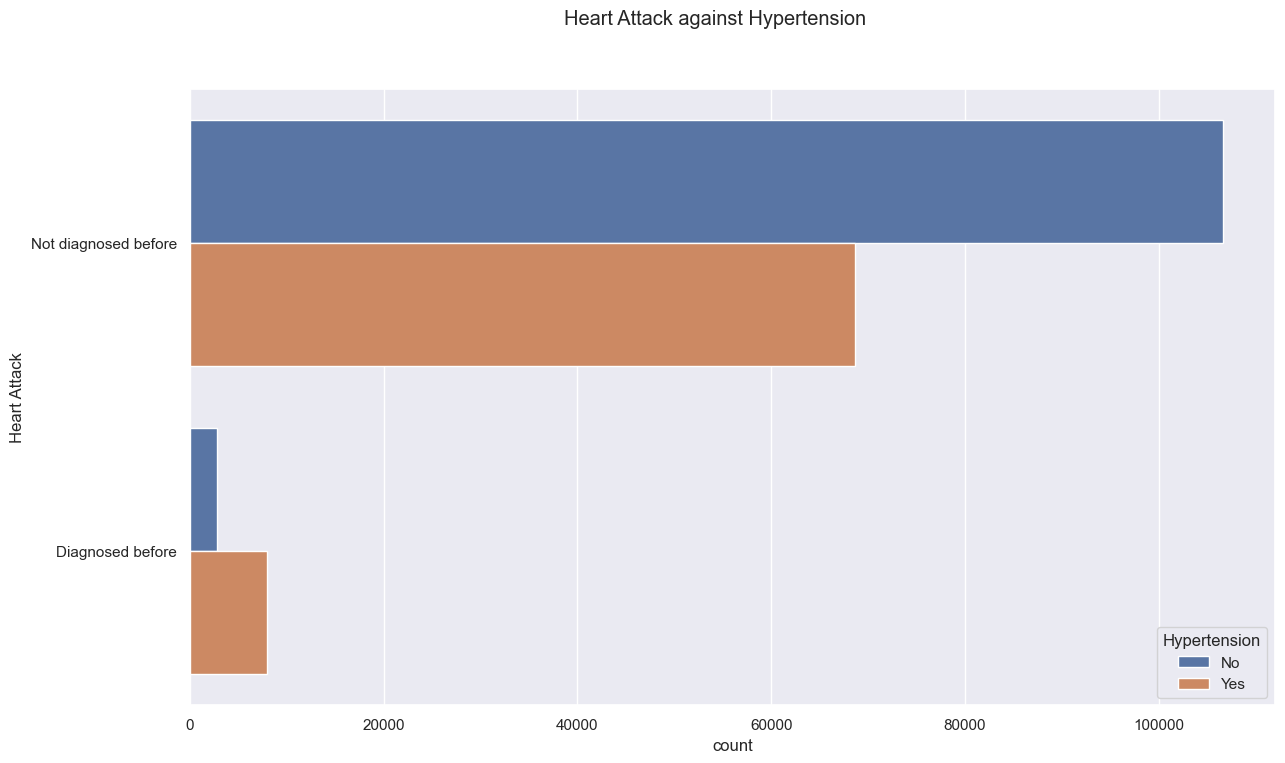

In [13]:
comparison_countplot('Heart Attack',0)

**Interpretation of the Plot**<br>
The distribution of `hypertension` varies significantly depending on whether a `heart attack` has been diagnosed or not. When it has been diagnosed before, there are more cases of `hypertension` but when it has not been diagnosed before, there are significantly more cases of no `hypertension`. Hence, there is a strong positive correlation between `heart attack` and `hypertension`.

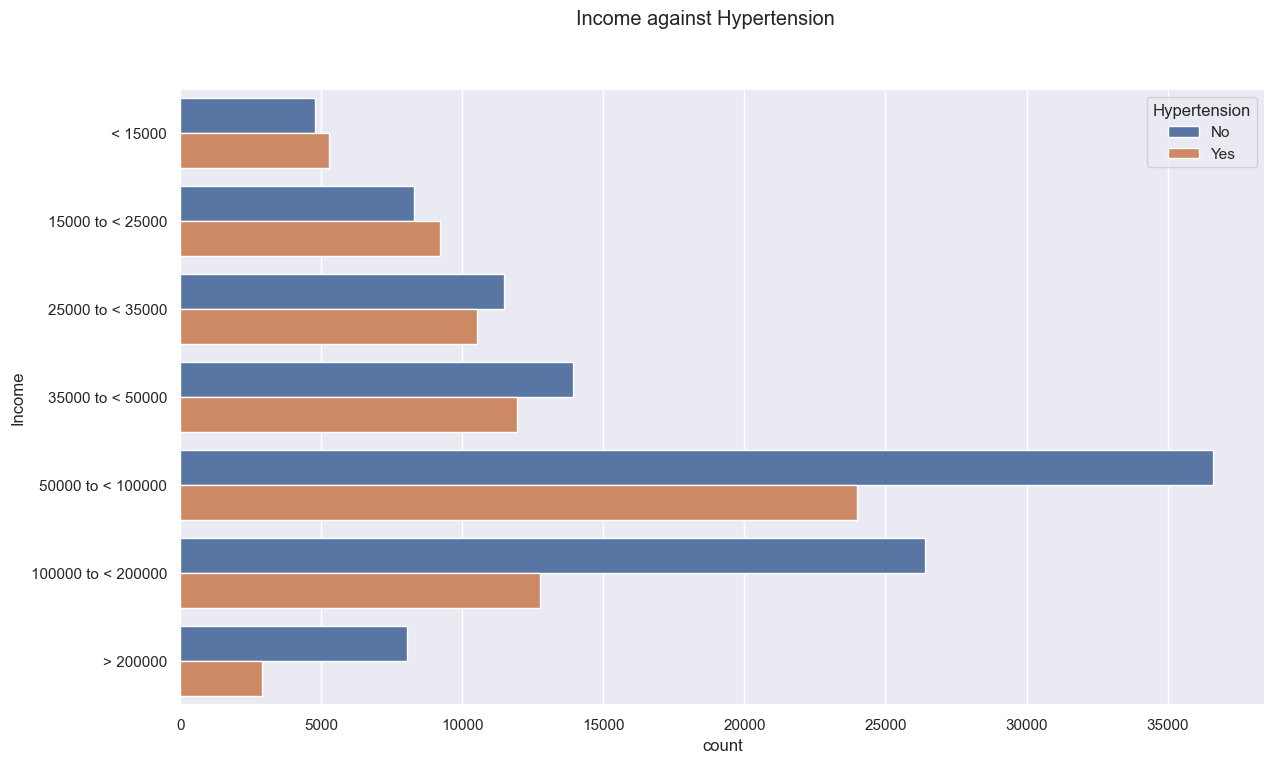

In [14]:
IncomeOrder = ["< 15000",
"15000 to < 25000",
"25000 to < 35000",
"35000 to < 50000",
"50000 to < 100000",
"100000 to < 200000",
"> 200000"]
comparison_countplot('Income',IncomeOrder)

**Interpretation of the Plot**<br>
The distribution of `hypertension` varies for each `income` level. The amount of 'Yes' `hypertension` is very large compared to the amount of 'No' `hypertension` in each `income` level for incomes less than 50000. The difference in 'Yes' and 'No' `hypertension` is not significant in those `income` levels. However at incomes greater than 50000, there are significantly more 'No' hypertension. Hence, there is a strong relation between `income` and `hypertension`.

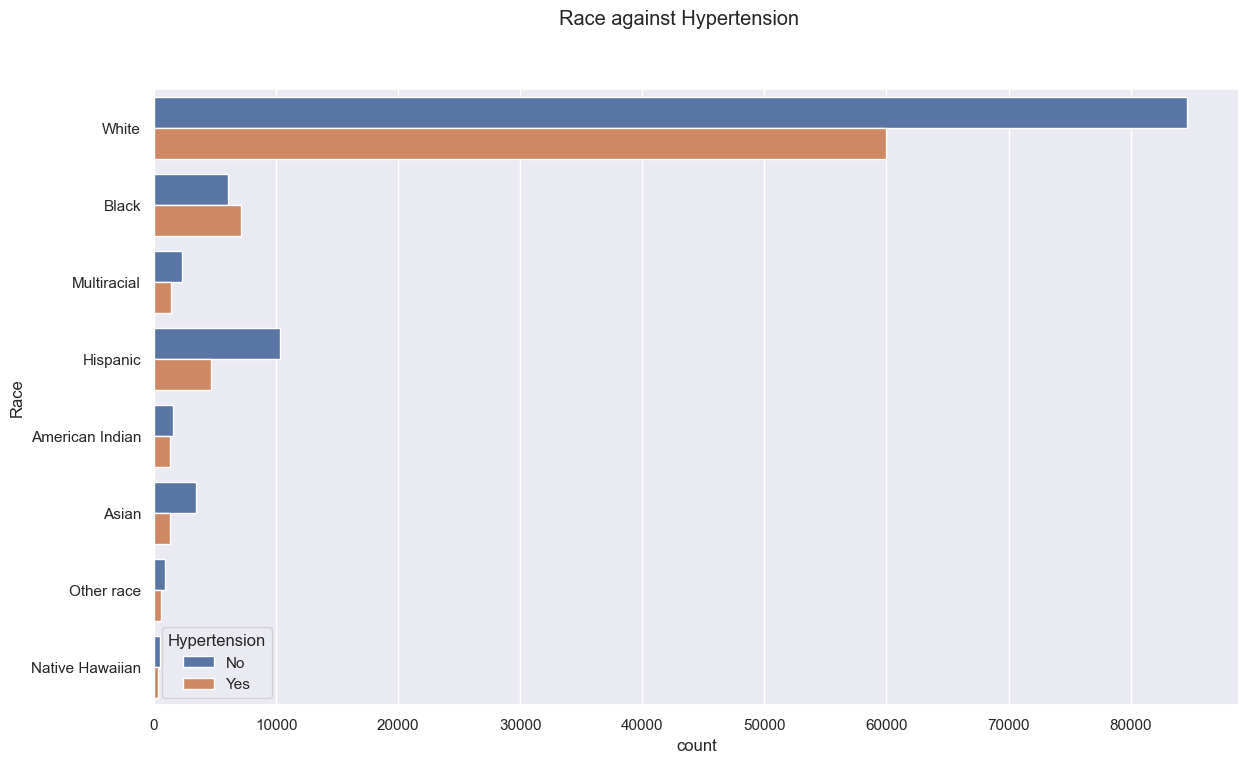

In [15]:
comparison_countplot('Race',0)

**Interpretation of the Plot**<br>
The distribution of `Hypertension` is different for each `Race`. For 'White', 'Hispanic' and 'Asian', there are significantly more 'No' `Hypertension` cases, and 'Black' having more 'Yes' `Hypertension` cases. The rest of the `Race` have similar distribution of `Hypertension`. This indicates that there is a weak relation between `Race` and `Hypertension`. However, due to skewed data of 'White', this data should not be used.

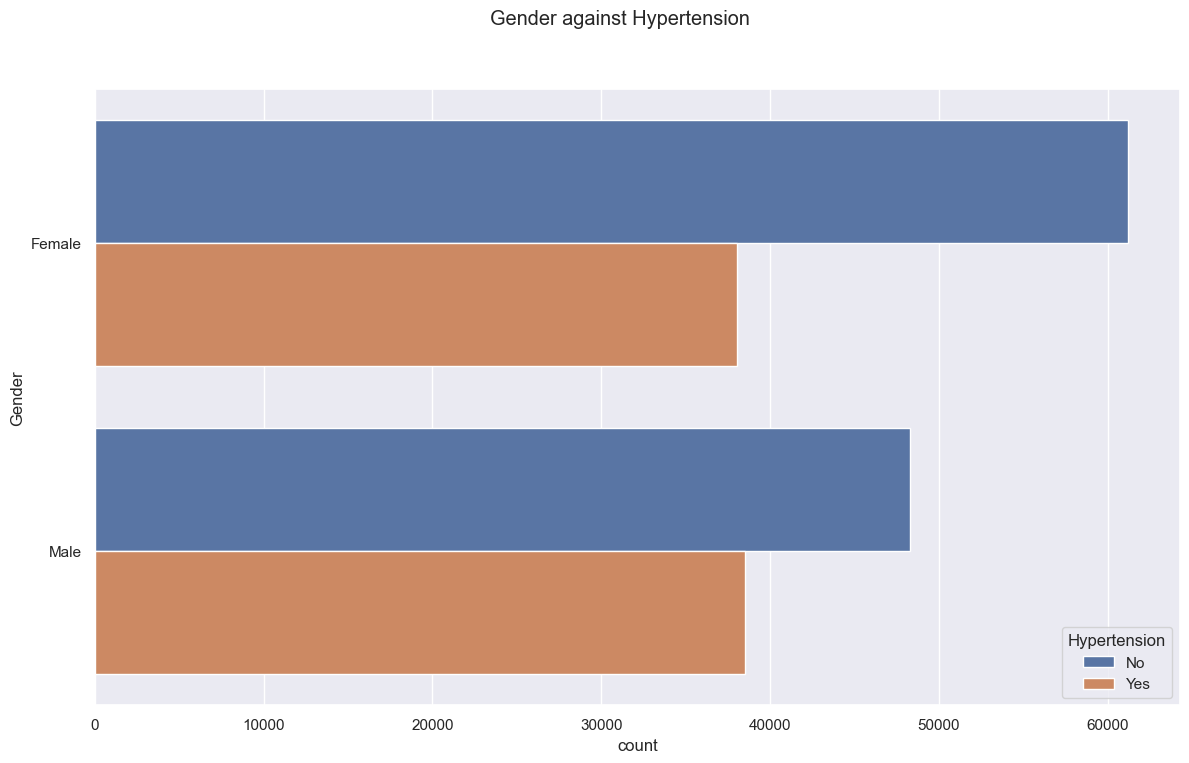

In [16]:
comparison_countplot('Gender',0)

**Interpretation of the Plot**<br>
The distribution of `hypertension` is similar for the different `genders`. Both 'female' and 'male' have more cases of 'no' `hypertension`. Thus there no correlation between `gender` and `hypertension`.

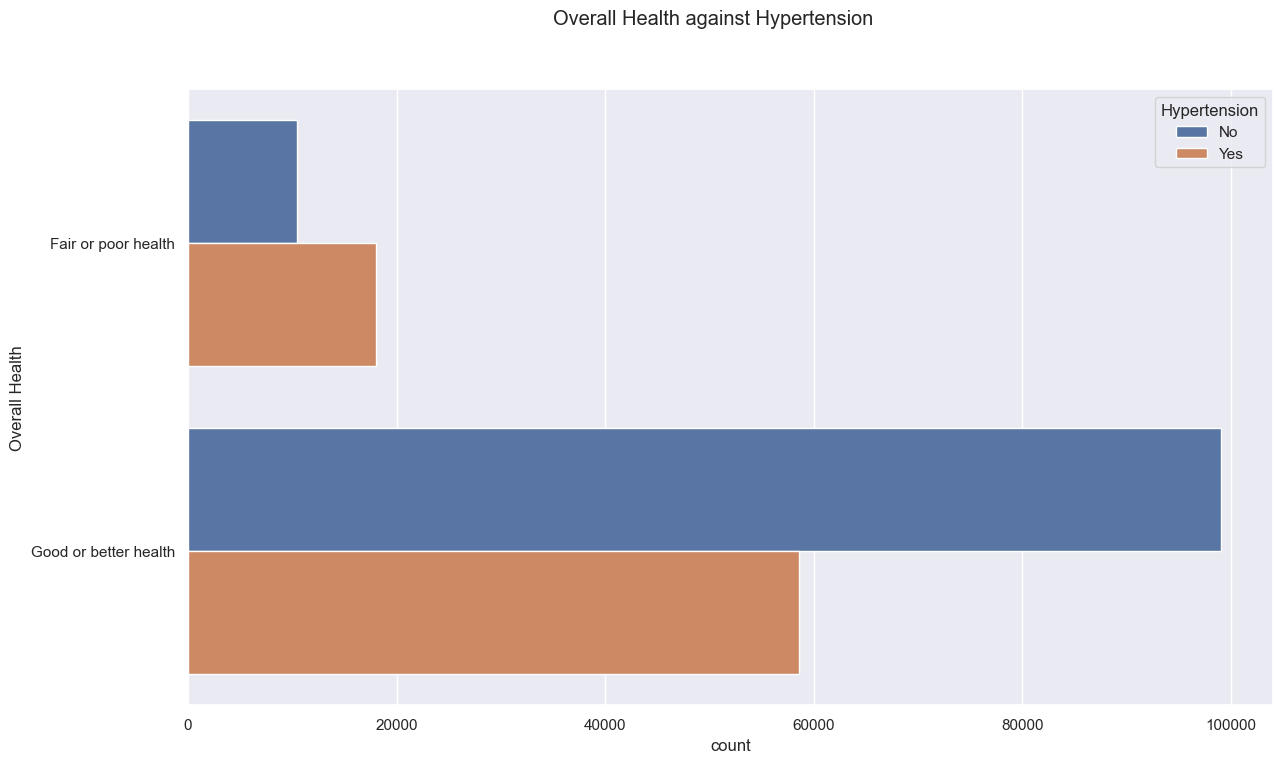

In [17]:
comparison_countplot('Overall Health',0)

**Interpretation of the Plot**<br>
The distribution of `hypertension` is different for different levels of `overall health`. Those with 'fair or poor health' have more cases of 'Yes' `hypertension` while those with 'good or better health' have more of 'No' `hypertension`. Hence, there is a strong correlation between `overall health` and `hypertension`.

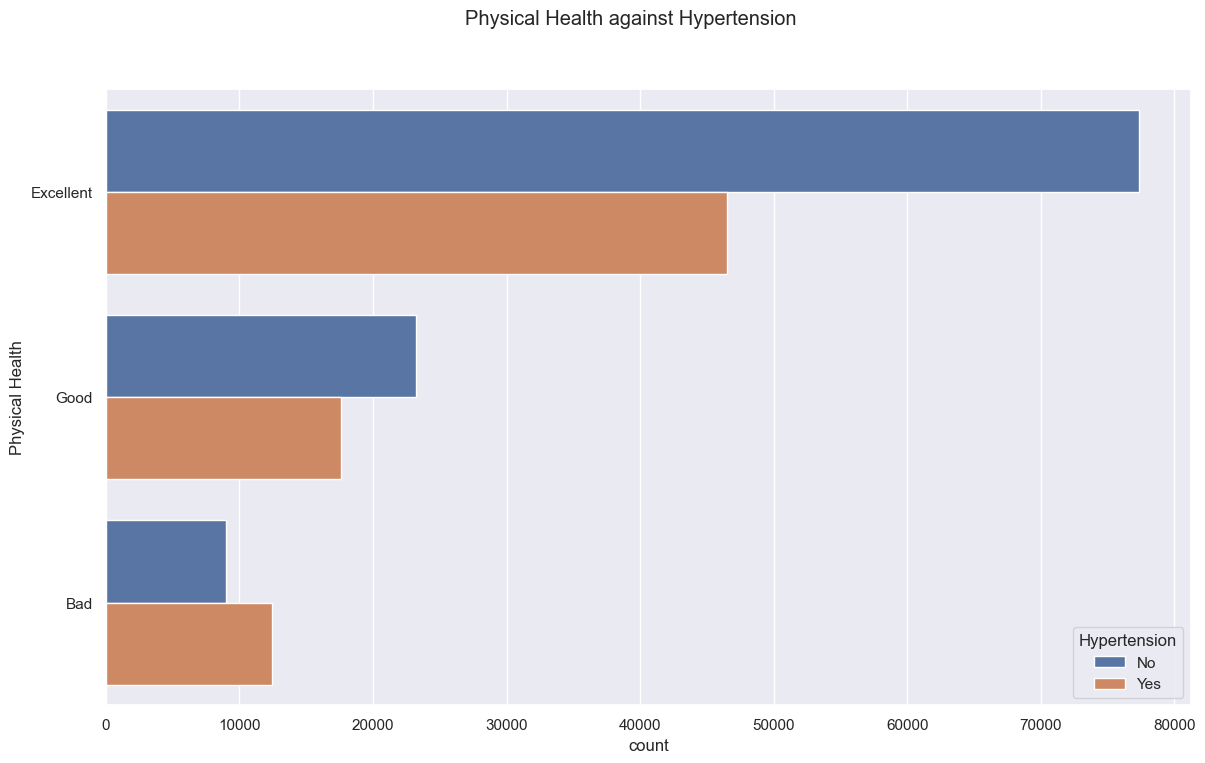

In [18]:
MHPYOrder = ['Excellent','Good','Bad']
comparison_countplot('Physical Health',MHPYOrder)

**Interpretation of the Plot**<br>
The distribution of `hypertension` is different for the different levels of `physical health`. Those with 'bad' `physical health` has more  'Yes' `hypertension`, while those with 'good' and 'excellent' `physical health` has more 'No' `hypertension`, with 'excellent' `physical health` having a significantly lower proportion of Yes' `hypertension` cases. </br>
Hence, there is a strong correlation between `physical health` and `hypertension`.

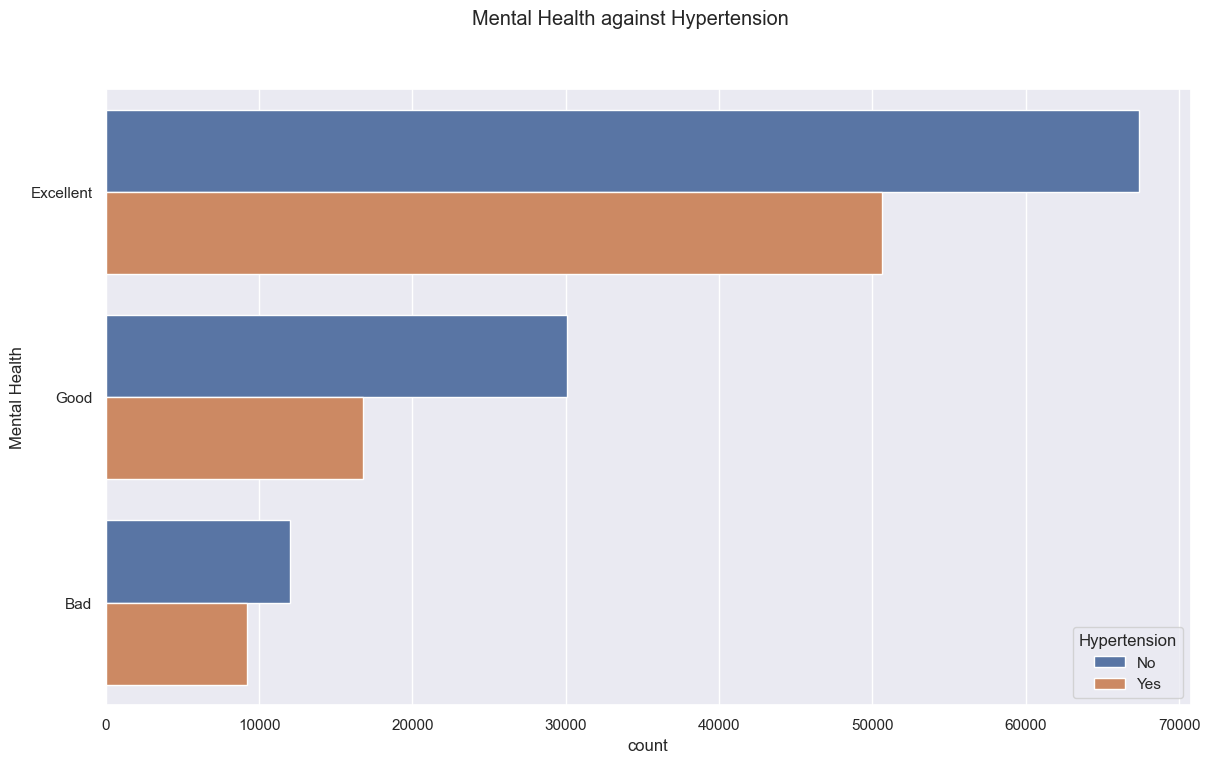

In [19]:
MHPYOrder = ['Excellent','Good','Bad']
comparison_countplot('Mental Health',MHPYOrder)

**Interpretation of the Plot**</br>
When `Mental Health` is 'Excellent' and 'Bad', there seems to be a higher propotion of 'Yes' `Hypertension` cases. However, the distributioon in general are similar. 
Hence, there seems to be a weak correlation between `Mental Health` and `Hypertension`. 

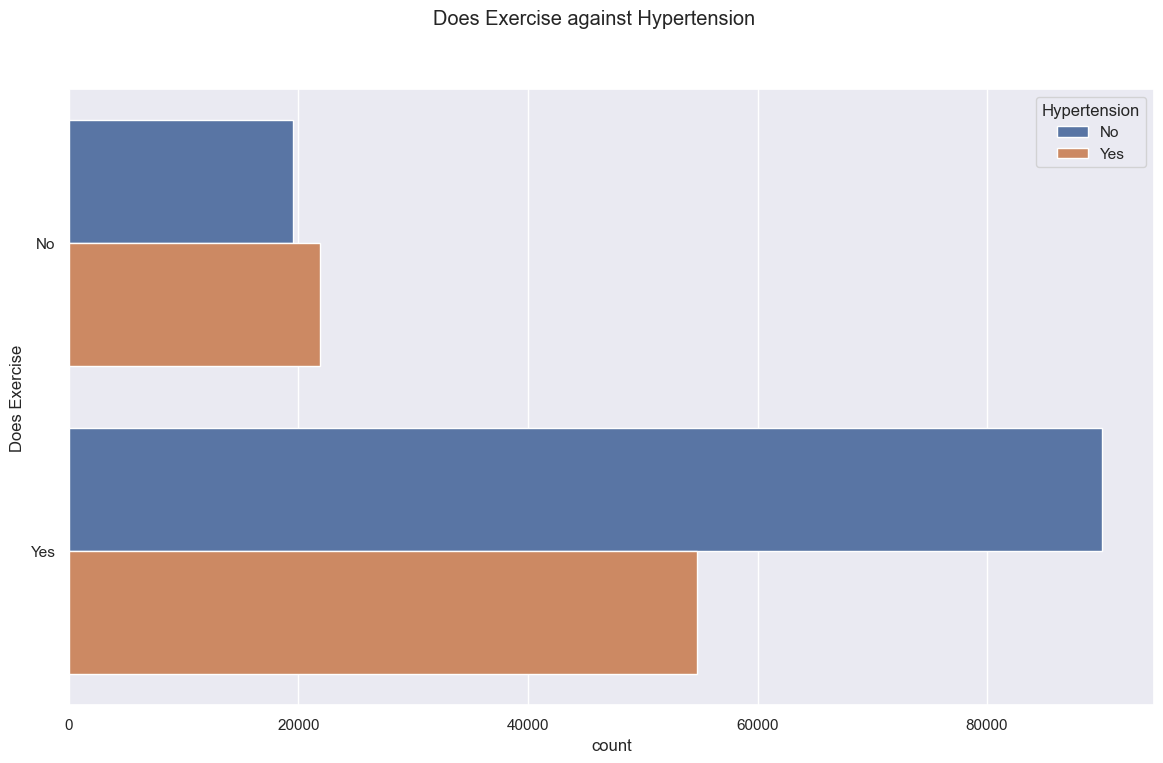

In [20]:
YNOrder = ['No','Yes']
comparison_countplot('Does Exercise',YNOrder)

**Interpretation of the Plot**</br>
When 'No' exercise is done, there are more 'Yes' `Hypertension` cases, and when 'Yes' Exercises done, there is a significantly more 'No' `Hypertension` cases </br>
Hence, it is clear that `Does Exercise` has a strong inverse co-relation to `Hypertension`.

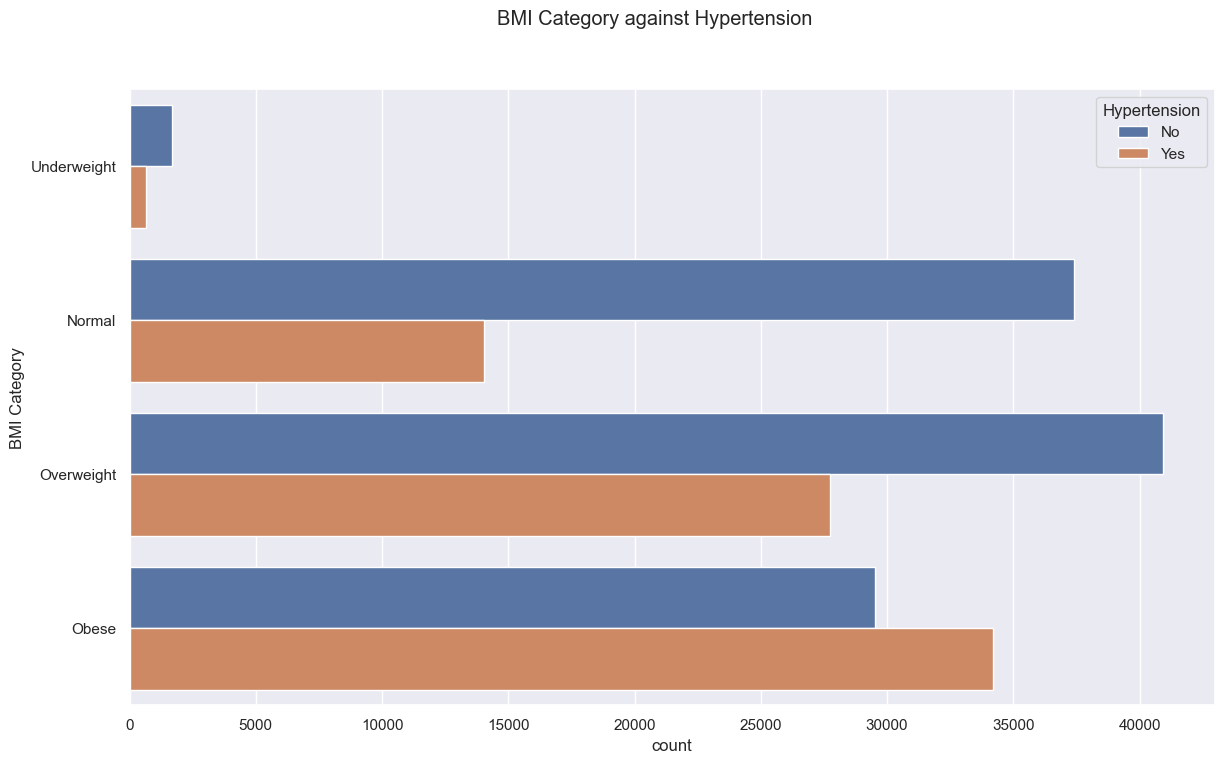

In [21]:
BMIOrder = ['Underweight','Normal', 'Overweight','Obese']
comparison_countplot('BMI Category',BMIOrder)

**Interpretation of the Plot**</br>
When `BMI Category` goes from underweight to overweight as seen in 'state' order, the proportion of 'Yes' 'Hypertension' cases increases, with there being more 'Yes' than 'No' cases when `BMI Category` is 'Obese'.</br>
Hence, it is clear that `BMI Category` has a strong relation to `Hypertension`.


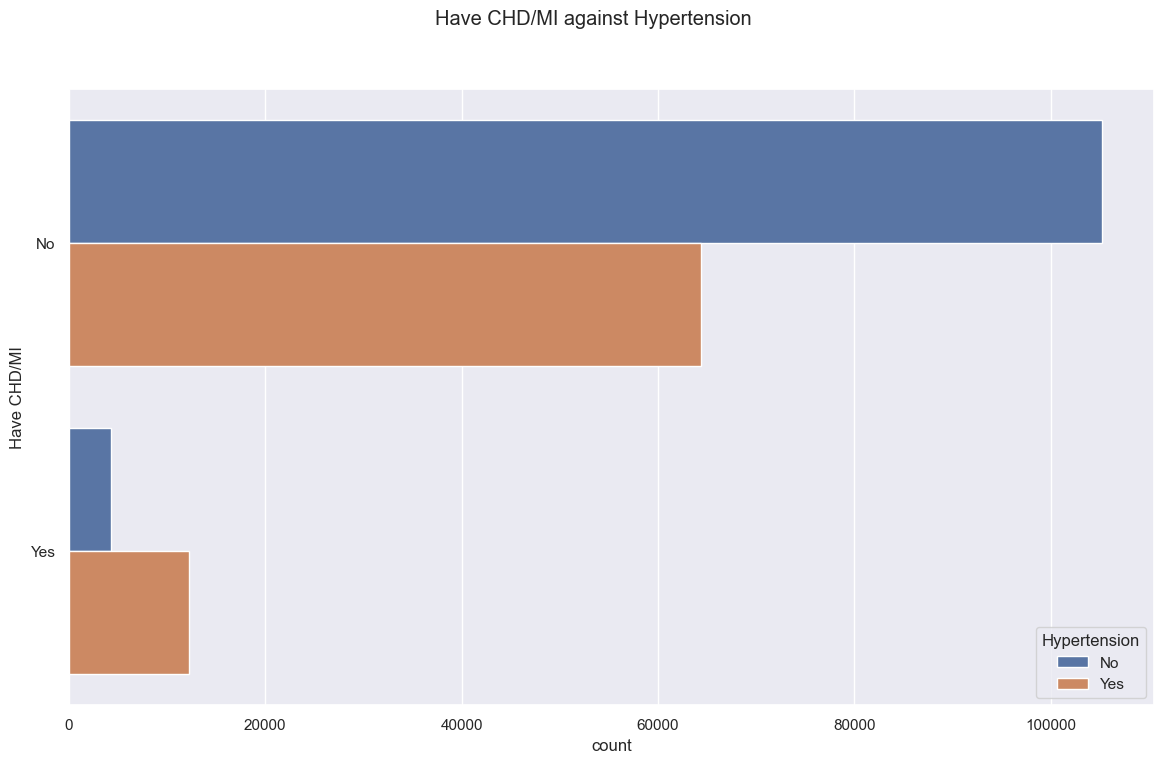

In [22]:
comparison_countplot('Have CHD/MI',YNOrder)

**Interpretation of the Plot**</br>
When `CHD/MI` is 'yes', the number of 'yes `Hypertension` cases are higher. Vice versa, 
When `CHD/MI` is 'No', the number of 'No `Hypertension` cases are higher.</br>
Hence, it is clear that `CHD/MI` has a strong relation to `Hypertension`.


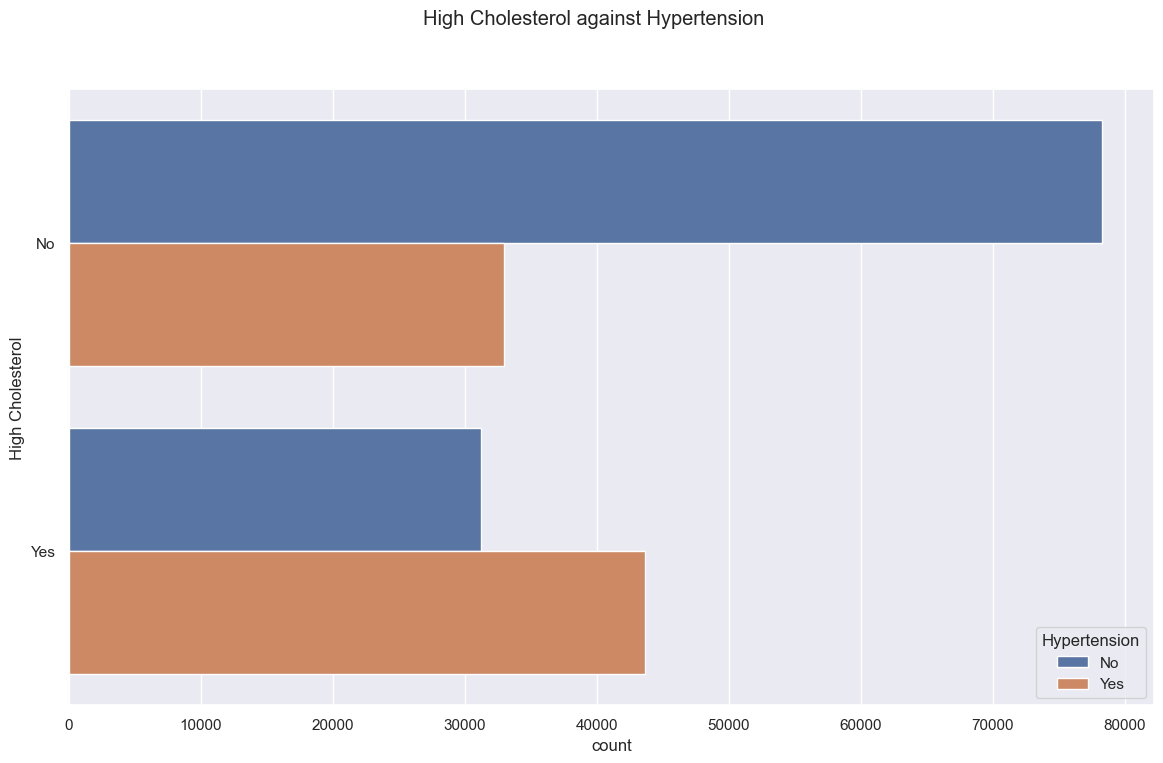

In [23]:
comparison_countplot('High Cholesterol',YNOrder)

**Interpretation of the Plot**</br>

When `High Cholesterol` is 'Yes', there are more 'Yes' `Hypertension` cases, and vice versa, when `High Cholesterol` is 'No', there are more 'No' `Hypertension` cases
</br>
Hence, it is clear that `High Cholesterol` has a strong co-relation to `Hypertension`.

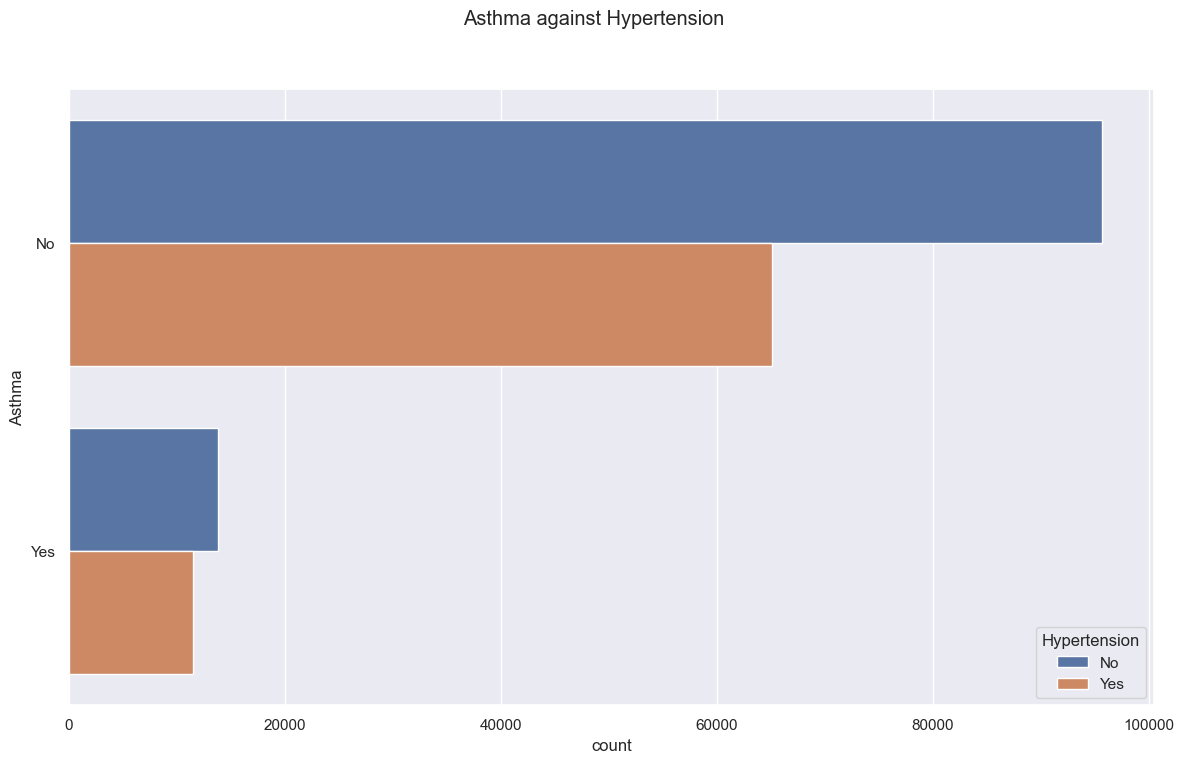

In [24]:
comparison_countplot('Asthma',YNOrder)

**Interpretation of the Plot**</br>
There are more 'No' `Hypertension` cases, for both 'Yes and 'No' cases for `Asthma`
</br>
Hence, it is clear that `Asthma` has a weak co-relation to `Hypertension`.

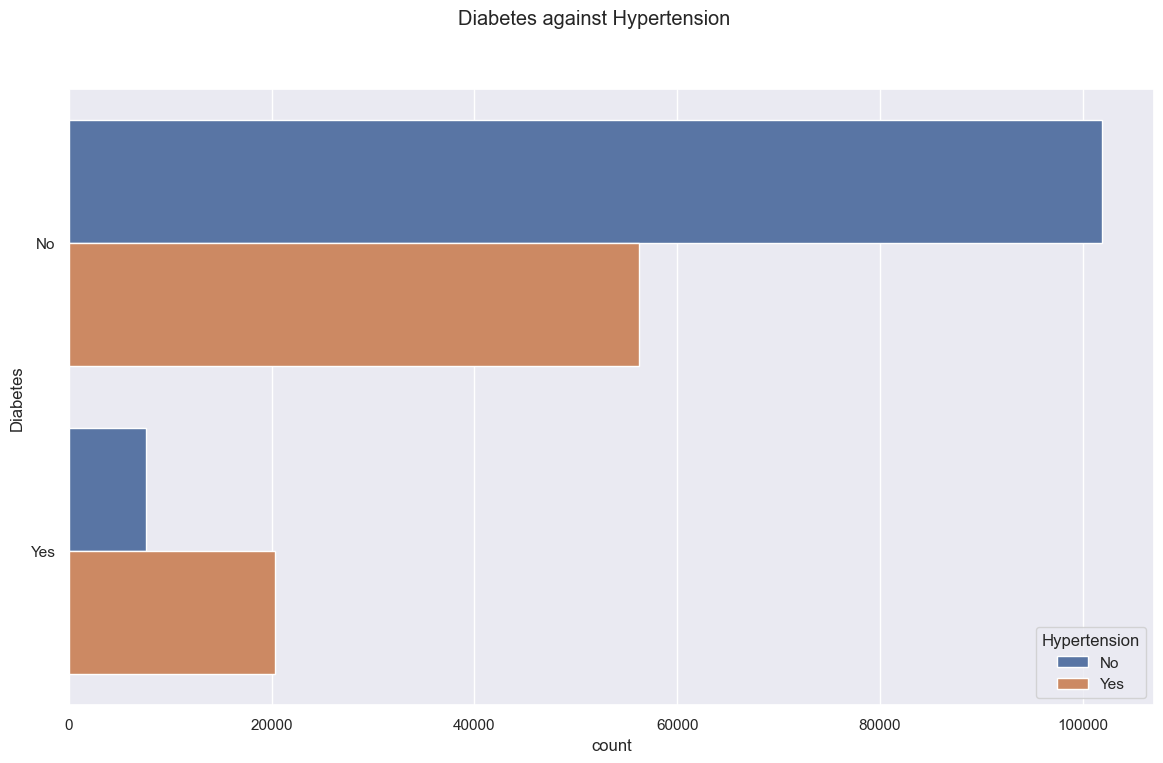

In [25]:
comparison_countplot('Diabetes',0)

**Interpretation of the Plot**</br>
When `Diabetes` is 'Yes', there are more 'Yes' `Hypertension` cases, and vice versa, when `Diabetes` is 'No', there are more 'No' `Hypertension` cases
</br>
Hence, it is clear that `Diabetes` has a strong correlation to `Hypertension`.

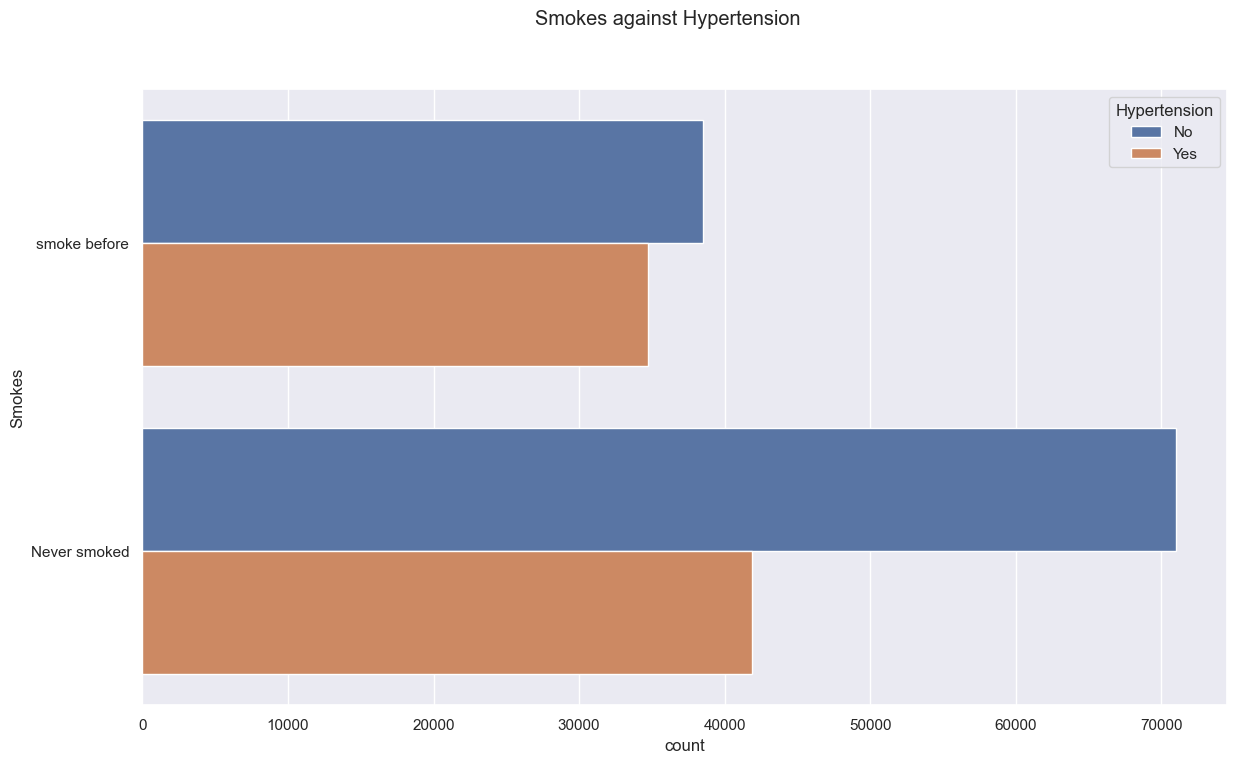

In [26]:
comparison_countplot('Smokes',0)

**Interpretation of the Plot**</br>
The distribution of `Hypertension` 'Yes' cases are the same for both 'smoke before' and 'Never smoked' for `Smokes`, with there having a slightly higher proportion of 'Yes' `Hypertension` cases when `Smokes` is 'smoke before'.
</br>
Hence, It is clear that `Smoke` has a weak co-relation to `Hypertension`.

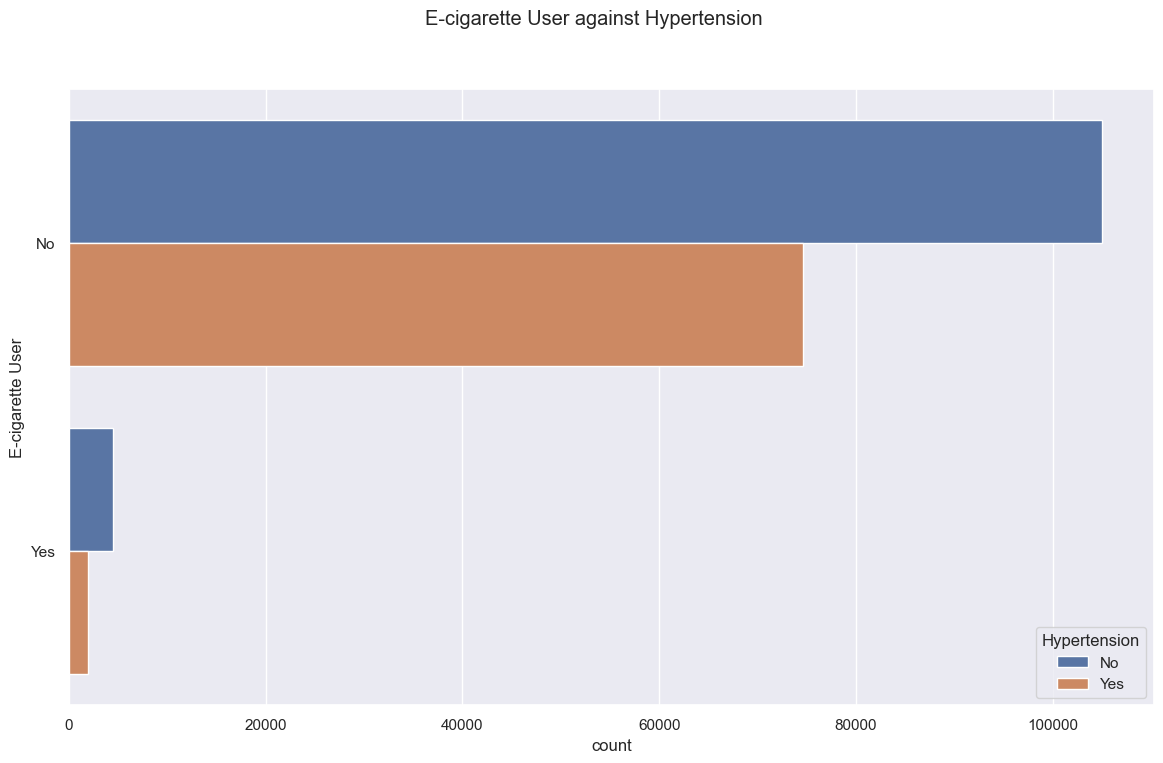

In [27]:
comparison_countplot('E-cigarette User',YNOrder)

**Interpretation of the Plot**</br>
The distribution of `Hypertension` 'Yes' cases are the same for both 'Yes' and 'No' for `E-cigarette User`.

</br>
Hence, it is clear that `E-cigarette User` has no co-relation to `Hypertension`.

--------------------------------------------------------------------

#### Summary of Findings
Based on the plots above, the following categorical variables are identified to have strong correlation with `hypertension`:
1. `Heart Attack`
2. `Physical Health`
3. `Does Exercise`
4. `Diabetes`
5. `Overall Health`
6. `BMI Category`
7. `Have CHD/MI`
8. `High Cholesterol`
9. `Income`
-------------------------
However, due to overlaps between domains, our group have decided to remove the folowing variables

1. `Heart Attack`, linked to `Have CHD/MI`
2. `Physical Health`, linked to `Overall Health`
3. `Does Exercise`, linked to `Overall Health` and `BMI Category`
--------------------------
Thus, the following variables for our machine learning models.

1. `Diabetes`
2. `Overall Health`
3. `BMI Category`
4. `Have CHD/MI`
5. `High Cholesterol`
6. `Income`

In [28]:
# export chosen variables as a csv file for quick access
vars = [
'Hypertension',
'Diabetes',
'Overall Health',
'BMI Category',
'Have CHD/MI',
'High Cholesterol',
'Income']
dataout = pd.DataFrame(rawData[vars])
dataout.to_csv("./Data/Final_Data.csv")